# Experiment with 9 Nodes from Cooja

In [1]:
#"Decomment for install"
#!pip install kmeans
#!pip install seaborn

In [21]:
#Modules to install via pip pandas,ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pprint import pprint
import os
import import_ipynb
import sys
import kmeans
sys.path.append('../')
from functions import *
from trace_analysis import *
from plots import *
from trace_analysis_cooja2 import *
from node import *
from pandas.plotting import scatter_matrix
import cmath as math
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
# scipy
from scipy.cluster.vq import kmeans,vq,whiten
import sklearn.metrics as sm
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline
import random
random.seed(6666)

In [34]:

dataList=coojaJsonImporter("../cooja-9nodes/traces")
data=[]
cases=[
      "BH1",
        "BH2",
    "normal"
      ]
BlackHole=[-1,4,5+8]
for nodeList in dataList:
    data.append(createNodes(nodeList))


Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json


In [3]:

def ReplaceMissingPackets(node):
    #print(node.pkts["pkt"])
    print("Executed")
    maxP=-1

    for el in node.pkts["seq"]:
        if(el>maxP): maxP=int(el)
    #print(maxP)
    pkt=[None]*(maxP+1)
    for i in range(len(node.pkts["seq"])):
        index=int(node.pkts["seq"][i])
        #print(index)
        pkt[index]=node.pkts["rtt"][i]
        #pkt[)]=node.pkts["pkt"][i]
    return pkt


        #if(el)
    
#pprint(getPercentageMissingPackets(data[0][3].pkts,100))
#pprint(findMissingPackets(data[0][3]))


In [36]:
pings=getPings(data)
#All data collection is in variable node that is a list of list of nodes
#3 nets input x 9 nodes by net

d={ "label":[],
   "type":[],
    "count":[],
    "std":  [],
    "mean": [],
    "var":  [],
    #"25%":  [],
    #"50%":[],
    #"75%":[],
   #"min":[],
   #"max":[],
   "hop":[],
   #"missing":[],
   "packet loss":[],
   "outliers":[],
   "node":[]
}
#count=[]
labels=[]
var=[]
#window=100
#stats=pd.DataFrame(columns=columns)
rows=[count,labels]
for i in range(len(data)):
    #window=pings[i]
    
    for j in range(len(data[i])):
        n=pings[i]
        n=100
        window=100
        #print(n)
        for z in range(0,n,int(window)):
            if(z+window>n):break
            #print(z,z+window)
            
            #df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
            node=data[i][j].pkts
            name=str(j)+" "+cases[i]
            nodeWindow=node[(node["seq"]<z+window) & (node["seq"]>=z)]
            
            nodeWindowP=nodeWindow["rtt"]
            #df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
            #if(nodeWindowP.count()<window/2): break
            #current=data[i][j].pkts['rtt'][z:z+window]
            #print(nodeWindow.shape)
            d["count"].append(nodeWindowP.count())
            #Case without outliers
            #d["std"].append(getStdValues(data[i][j].pkts)["rtt"].std())

            #Case with outliers
            d["std"].append(nodeWindowP.std())

            d["mean"].append(nodeWindowP.mean())
            d["var"].append(nodeWindowP.var())
            d["label"].append(cases[i])
            #d["25%"].append(nodeWindow.describe()["25%"])
            #d["50%"].append(nodeWindow.describe()["50%"])
            #d["75%"].append(nodeWindow.describe()["75%"])
            #d["min"].append(nodeWindow.describe()["min"])
            #d["max"].append(nodeWindow.describe()["max"])
            d["hop"].append(data[i][j].hop)
            d["type"].append(cases[i])
            d["outliers"].append(getOutliers(nodeWindow)["rtt"].count())
            missing=window-nodeWindow.count()
            d["node"].append(data[i][j].ip)
            d["packet loss"].append(getPercentageMissingPackets(nodeWindow,window))

            
            
stats=pd.DataFrame(d)            

stats
print(stats.shape)
stats=stats.dropna()
print(stats.shape)
        
        

#correction=np.array(correction)
#correction_alt=np.array(correction_alt)

dataK=stats.drop([
    "label","mean","var","packet loss","count","node","type"],axis=1)

(27, 10)
(27, 10)


In [37]:
data=stats.drop([
    "label","mean","var","packet loss","count","node","type","hop"],axis=1)

dataC=stats["label"]

#Y = data[['var']]
#X = data[['std']]

Kmeans with 2 clusters, using just count, mean and hop feature we can get 100% of understanding probability of the node of being part of a Black Hole Network or not


In [38]:
data.head()

,std,outliers
0,1403.775442,5
1,1812.662114,6
2,1873.889033,6
3,1308.893667,6
4,2220.932875,2


In [30]:
def accuracy_score_corrected(correction,labels):
    print(np.array(correction))
    labels_alt=[]
    for el in labels:
        if (el==0):
            labels_alt.append(1)
        elif el==1:
            labels_alt.append(0)
    
    accuracy=sm.accuracy_score(correction, labels)
    accuracy_alt=sm.accuracy_score(correction, labels_alt)
    #print(correction)
    if (accuracy>accuracy_alt): 
        print(accuracy)
        
    else: 
        print(accuracy_alt)
        labels=labels_alt
    print(np.array(labels))
    confusionMatrix=sm.confusion_matrix(correction, labels)
    
    pprint(confusionMatrix)
    return labels
    
    

In [40]:




correction=[]
correction_alt=[] #for 3 cluster 0:normal net 1:bh net 2:bh
col=np.array(stats["type"])
#Creating simple array to correct unsupervised learning
#NB as it is unsupervised could happen that the correction are inverted
for i in range(len(col)):
    el=d["type"][i]
    if el=="normal":
        correction.append(1)
        correction_alt.append(0)
        
    else:
        #print(el=="BH2" and i==BlackHole[2])
        correction.append(0)
        correction_alt.append(1)
                        

dataC=stats["label"]

#Y = data[['var']]
#X = data[['std']]

kmeans = KMeans(n_clusters=2)
kmeans.fit(dataK)
labels = kmeans.predict(dataK)
centroids = kmeans.cluster_centers_

#print(labels)
#print(labels)
#print(correction)

# Performance Metrics
#print(accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
#confusionMatrix=sm.confusion_matrix(correction, labels)
#print(accuracy)
#print(confusionMatrix)

labels=accuracy_score_corrected(correction,labels)
predicted=[]
for i in range(len(labels)):
    
    if(labels[i]==1):
        predicted.append("normal")
    else: predicted.append("BH")

#print(len(predicted))
stats["predicted"]=pd.Series(np.array(predicted))
stats["predicted number"]=pd.Series(np.array(labels))
stats["correction number"]=pd.Series(np.array(correction))
stats_csv=stats[[
    "label",
    "type",
    "predicted",
    #"packet loss",
    "outliers",
    "std",
    "hop",
    "node"
      
      
      ]]
stats_csv.to_csv("results_kmeans.csv", sep='\t', encoding='utf-8')
stats.head()


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
1.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
array([[18,  0],
       [ 0,  9]])


,label,type,predicted,packet loss,outliers,std,hop,node,predicted number,correction number
0,BH1,BH1,BH,2.0,5,1403.775442,1,aaaa::212:7404:4:404:,0,0
1,BH1,BH1,BH,1.0,6,1812.662114,1,aaaa::212:7403:3:303:,0,0
2,BH1,BH1,BH,9.0,6,1873.889033,2,aaaa::212:740b:b:b0b:,0,0
3,BH1,BH1,BH,3.0,6,1308.893667,1,aaaa::212:7402:2:202:,0,0
4,BH1,BH1,BH,75.0,2,2220.932875,3,aaaa::212:7409:9:909:,0,0


In [43]:
net_results={
   "case":[],
    "predicted":[],
    "real":[]
}
#print(stats["predicted number"])
for case in range(len(cases)):
    subset=stats[stats["label"]==cases[case]]
    mean_predicted=str(subset["predicted number"].mean()*100)+"% normal"
    net_results["case"].append(cases[case])
    net_results["predicted"].append(mean_predicted)
    net_results["real"].append(cases[case])

    
results=pd.DataFrame(net_results)  

results

,case,predicted,real
0,BH1,0.0% normal,BH1
1,BH2,0.0% normal,BH2
2,normal,100.0% normal,normal


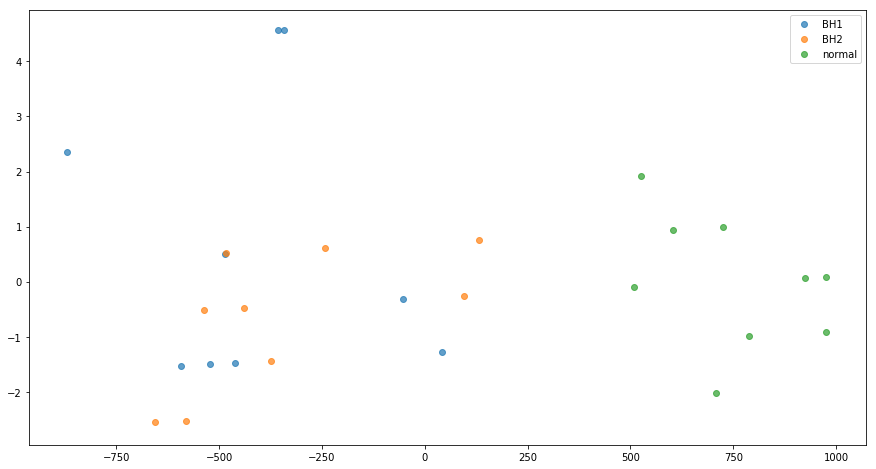

In [32]:
X = data.iloc[:,0:4]
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()

labels = stats['label'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.7)
    plt.legend()

As expected the Elbow curve tell us that we would have a high percentage of success using 2 or more clusters, as we are trying to find out if a network is Black Hole or not we just need two

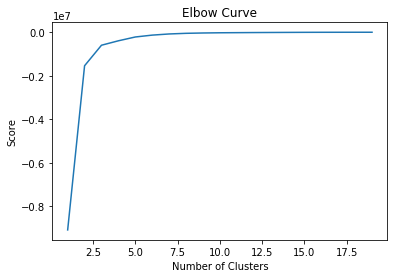

In [18]:
Y=data
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()
